In [146]:
# Kemp Carswell 801017179
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv('C:/Users/kemp/Downloads/D3.csv')

In [148]:
X = df.values[:,[0,1,2]] # get input values from first three columns
y = df.values[:,3] # get output values from fourth column

In [149]:
mean = np.ones(X.shape[1])
std = np.ones(X.shape[1])
for i in range(0, X.shape[1]):
    mean[i] = np.mean(X.transpose()[i])
    std[i] = np.std(X.transpose()[i])
    for j in range(0, X.shape[0]):
        X[j][i] = (X[j][i] - mean[i])/std[i]

In [150]:
def compute_cost(X, n, theta):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [151]:
def gradient_descent(X, y, theta, alpha, iterations, n, h):
    cost = np.ones(iterations)
    for i in range(0,iterations):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = compute_cost(X, n, theta)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [152]:
def linear_regression(X, y, alpha, iterations):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = compute_cost(X, n, theta)
    theta, cost = gradient_descent(X, y, theta, alpha, iterations, n, h)
    return theta, cost

In [153]:
iterations = 1500;
alpha = 0.1;

In [154]:
theta, cost = linear_regression(X, y, alpha, iterations)
print('Final value of theta =', theta)
cost = list(cost)
n_ierations = [x for x in range(1,1501)]

Final value of theta = [[ 1.82565677 -2.35781332  0.65275329 -0.33677366]]


Text(0.5, 1.0, 'Convergence of gradient descent')

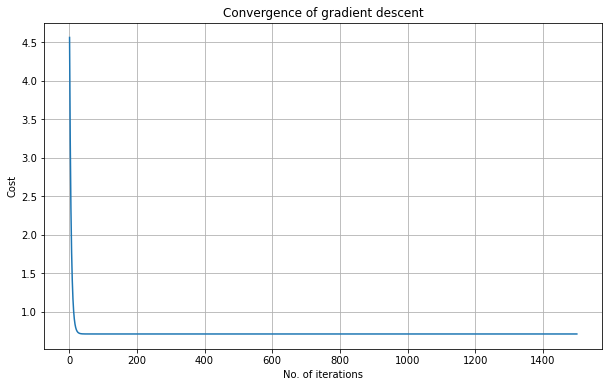

In [155]:
plt.plot(n_ierations, cost)
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Convergence of gradient descent')